In [1]:
!nvidia-smi 

Tue Oct 18 10:14:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!wget https://cloudstor.aarnet.edu.au/plus/s/zAg8lW7nmv69OFg/download

--2022-10-18 10:14:05--  https://cloudstor.aarnet.edu.au/plus/s/zAg8lW7nmv69OFg/download
Resolving cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)... 202.158.207.20
Connecting to cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)|202.158.207.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Syntax error in Set-Cookie: 5230042dc1897=je8s2nn8b4rt6dkti50b206gjb; path=/plus;; Secure at position 53.
Syntax error in Set-Cookie: oc_sessionPassphrase=abwoExHinVaVn3hqzTC1j50TXfH2m6BFgSYcaa%2BTSvGjiOMpTjwgmskC8BgS2KGVyQ6faIFxnRqrToH3a%2BAiTqpZNqrUowroDPmRZyipwx3vCcxvemyoxtBk%2BV5Gp6LC; expires=Wed, 19-Oct-2022 10:14:06 GMT; Max-Age=86400; path=/plus;; Secure at position 222.
Length: 1286378752 (1.2G) [application/zip]
Saving to: ‘download’

download            100%[===================>]   1.20G  30.8MB/s    in 42s     

2022-10-18 10:14:47 (29.5 MB/s) - ‘download’ saved [1286378752/1286378752]



In [3]:
!unzip download

Archive:  download
   creating: DL_Assign2/
  inflating: DL_Assign2/jx_vit_base_patch16_224_in21k-e5005f0a.pth  
  inflating: DL_Assign2/.DS_Store    
  inflating: __MACOSX/DL_Assign2/._.DS_Store  
  inflating: DL_Assign2/LICENSE      
   creating: DL_Assign2/weights/
  inflating: DL_Assign2/panda.jpg    
  inflating: __MACOSX/DL_Assign2/._panda.jpg  
   creating: DL_Assign2/models/
  inflating: DL_Assign2/utils.py     
   creating: DL_Assign2/.git/
  inflating: DL_Assign2/VIT_CLIP_Prompt.ipynb  
  inflating: __MACOSX/DL_Assign2/._VIT_CLIP_Prompt.ipynb  
  inflating: DL_Assign2/weights/.DS_Store  
  inflating: __MACOSX/DL_Assign2/weights/._.DS_Store  
  inflating: DL_Assign2/weights/model-9.pth  
  inflating: DL_Assign2/models/prompters.py  
   creating: DL_Assign2/models/__pycache__/
  inflating: DL_Assign2/models/download_models.sh  
  inflating: DL_Assign2/.git/config  
   creating: DL_Assign2/.git/objects/
  inflating: DL_Assign2/.git/HEAD    
   creating: DL_Assign2/.git/info/
   

In [4]:
%cd /content/DL_Assign2

/content/DL_Assign2


In [5]:
%pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 34.3 MB/s 
     |████████████████████████████████| 162 kB 65.8 MB/s 
     |████████████████████████████████| 182 kB 74.6 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 162 kB 78.8 MB/s 
     |████████████████████████████████| 158 kB 66.8 MB/s 
     |████████████████████████████████| 157 kB 79.7 MB/s 
     |████████████████████████████████| 157 kB 79.4 MB/s 
     |████████████████████████████████| 157 kB 77.8 MB/s 
     |████████████████████████████████| 157 kB 77.9 MB/s 
     |████████████████████████████████| 157 kB 81.1 MB/s 
     |████████████████████████████████| 157 kB 79.0 MB/s 
     |████████████████████████████████| 157 kB 81.8 MB/s 
     |████████████████████████████████| 156 kB 72.1 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=e

In [6]:
from functools import partial
from collections import OrderedDict
import torch
import torch.nn as nn


import os
import sys
import json
import pickle
import random
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

In [7]:
from __future__ import print_function

import argparse
import os
from tqdm import tqdm
import time
import random
import numpy as np
import wandb

In [8]:
import numpy as np
import wandb

import torch
import torch.backends.cudnn as cudnn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR100
from models import prompters
from utils import accuracy, AverageMeter, ProgressMeter, save_checkpoint, cosine_lr, refine_classname

In [9]:
def drop_path(x, drop_prob: float = 0., training: bool = False):
    if drop_prob == 0. or not training:
        return x
        
    keep_prob = 1 - drop_prob
    shape = (x.shape[0],) + (1,) * (x.ndim - 1) 
    random_tensor = keep_prob + torch.rand(shape, dtype=x.dtype, device=x.device)
    random_tensor.floor_() 
    output = x.div(keep_prob) * random_tensor
    return output

In [10]:
class DropPath(nn.Module):
    def __init__(self, drop_prob=None):
        super(DropPath, self).__init__()
        self.drop_prob = drop_prob

    def forward(self, x):
        return drop_path(x, self.drop_prob, self.training)

In [11]:
class PatchEmbed(nn.Module):

    def __init__(self, img_size=224, patch_size=16, in_c=3, embed_dim=768, norm_layer=None):
        super().__init__()
        img_size = (img_size, img_size)
        patch_size = (patch_size, patch_size)
        self.img_size = img_size
        self.patch_size = patch_size
        self.grid_size = (img_size[0] // patch_size[0], img_size[1] // patch_size[1])
        self.num_patches = self.grid_size[0] * self.grid_size[1]

        self.proj = nn.Conv2d(in_c, embed_dim, kernel_size=patch_size, stride=patch_size)
        self.norm = norm_layer(embed_dim) if norm_layer else nn.Identity()

    def forward(self, x):
        B, C, H, W = x.shape
        assert H == self.img_size[0] and W == self.img_size[1], \
            f"Input image size ({H}*{W}) doesn't match model ({self.img_size[0]}*{self.img_size[1]})."

        x = self.proj(x).flatten(2).transpose(1, 2)
        x = self.norm(x)
        return x

In [12]:
class Attention(nn.Module):
    def __init__(self,
                 dim,   # 输入token的dim
                 num_heads=8,
                 qkv_bias=False,
                 qk_scale=None,
                 attn_drop_ratio=0.,
                 proj_drop_ratio=0.):
      
        super(Attention, self).__init__()
        self.num_heads = num_heads
        head_dim = dim // num_heads
        self.scale = qk_scale or head_dim ** -0.5
        self.qkv = nn.Linear(dim, dim * 3, bias=qkv_bias)
        self.attn_drop = nn.Dropout(attn_drop_ratio)
        self.proj = nn.Linear(dim, dim)
        self.proj_drop = nn.Dropout(proj_drop_ratio)

    def forward(self, x):
      
        B, N, C = x.shape
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, C // self.num_heads).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]  

        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)
        attn = self.attn_drop(attn)

        x = (attn @ v).transpose(1, 2).reshape(B, N, C)
        x = self.proj(x)
        x = self.proj_drop(x)
        return x

In [13]:
class Mlp(nn.Module):
  
    def __init__(self, in_features, hidden_features=None, out_features=None, act_layer=nn.GELU, drop=0.):
        super().__init__()
        out_features = out_features or in_features
        hidden_features = hidden_features or in_features
        self.fc1 = nn.Linear(in_features, hidden_features)
        self.act = act_layer()
        self.fc2 = nn.Linear(hidden_features, out_features)
        self.drop = nn.Dropout(drop)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.drop(x)
        return x

In [14]:
class Block(nn.Module):
    def __init__(self,
                 dim,
                 num_heads,
                 mlp_ratio=4.,
                 qkv_bias=False,
                 qk_scale=None,
                 drop_ratio=0.,
                 attn_drop_ratio=0.,
                 drop_path_ratio=0.,
                 act_layer=nn.GELU,
                 norm_layer=nn.LayerNorm):
        super(Block, self).__init__()
        self.norm1 = norm_layer(dim)
        self.attn = Attention(dim, num_heads=num_heads, qkv_bias=qkv_bias, qk_scale=qk_scale,
                              attn_drop_ratio=attn_drop_ratio, proj_drop_ratio=drop_ratio)
        # NOTE: drop path for stochastic depth, we shall see if this is better than dropout here
        self.drop_path = DropPath(drop_path_ratio) if drop_path_ratio > 0. else nn.Identity()
        self.norm2 = norm_layer(dim)
        mlp_hidden_dim = int(dim * mlp_ratio)
        self.mlp = Mlp(in_features=dim, hidden_features=mlp_hidden_dim, act_layer=act_layer, drop=drop_ratio)

    def forward(self, x):
        x = x + self.drop_path(self.attn(self.norm1(x)))
        x = x + self.drop_path(self.mlp(self.norm2(x)))
        return x

In [15]:
class VisionTransformer(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_c=3, num_classes=1000,
                 embed_dim=768, depth=12, num_heads=12, mlp_ratio=4.0, qkv_bias=True,
                 qk_scale=None, representation_size=None, distilled=False, drop_ratio=0.,
                 attn_drop_ratio=0., drop_path_ratio=0., embed_layer=PatchEmbed, norm_layer=None,
                 act_layer=None):
      
        super(VisionTransformer, self).__init__()
        self.num_classes = num_classes
        self.num_features = self.embed_dim = embed_dim  # num_features for consistency with other models
        self.num_tokens = 2 if distilled else 1
        norm_layer = norm_layer or partial(nn.LayerNorm, eps=1e-6)
        act_layer = act_layer or nn.GELU

        self.patch_embed = embed_layer(img_size=img_size, patch_size=patch_size, in_c=in_c, embed_dim=embed_dim)
        num_patches = self.patch_embed.num_patches

        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.dist_token = nn.Parameter(torch.zeros(1, 1, embed_dim)) if distilled else None
        self.pos_embed = nn.Parameter(torch.zeros(1, num_patches + self.num_tokens, embed_dim))
        self.pos_drop = nn.Dropout(p=drop_ratio)

        dpr = [x.item() for x in torch.linspace(0, drop_path_ratio, depth)]  # stochastic depth decay rule
        self.blocks = nn.Sequential(*[
            Block(dim=embed_dim, num_heads=num_heads, mlp_ratio=mlp_ratio, qkv_bias=qkv_bias, qk_scale=qk_scale,
                  drop_ratio=drop_ratio, attn_drop_ratio=attn_drop_ratio, drop_path_ratio=dpr[i],
                  norm_layer=norm_layer, act_layer=act_layer)
            for i in range(depth)
        ])
        self.norm = norm_layer(embed_dim)

        # Representation layer
        if representation_size and not distilled:
            self.has_logits = True
            self.num_features = representation_size
            self.pre_logits = nn.Sequential(OrderedDict([
                ("fc", nn.Linear(embed_dim, representation_size)),
                ("act", nn.Tanh())
            ]))
        else:
            self.has_logits = False
            self.pre_logits = nn.Identity()

        # Classifier head(s)
        self.head = nn.Linear(self.num_features, num_classes) if num_classes > 0 else nn.Identity()
        self.head_dist = None
        if distilled:
            self.head_dist = nn.Linear(self.embed_dim, self.num_classes) if num_classes > 0 else nn.Identity()

        nn.init.trunc_normal_(self.pos_embed, std=0.02)
        if self.dist_token is not None:
            nn.init.trunc_normal_(self.dist_token, std=0.02)

        nn.init.trunc_normal_(self.cls_token, std=0.02)
        self.apply(_init_vit_weights)

    def forward_features(self, x):
        
        x = self.patch_embed(x)                                 #  [B, C, H, W] -> [B, num_patches, embed_dim] / [B, 196, 768]
        cls_token = self.cls_token.expand(x.shape[0], -1, -1)   # [1, 1, 768] -> [B, 1, 768]

        if self.dist_token is None:
            x = torch.cat((cls_token, x), dim=1)  # [B, 197, 768]
        else:
            x = torch.cat((cls_token, self.dist_token.expand(x.shape[0], -1, -1), x), dim=1)

        x = self.pos_drop(x + self.pos_embed)
        x = self.blocks(x)
        x = self.norm(x)
        
        if self.dist_token is None:
            return self.pre_logits(x[:, 0])
        else:
            return x[:, 0], x[:, 1]

    def forward(self, x):
        x = self.forward_features(x)
        if self.head_dist is not None:
            x, x_dist = self.head(x[0]), self.head_dist(x[1])
            if self.training and not torch.jit.is_scripting():
                # during inference, return the average of both classifier predictions
                return x, x_dist
            else:
                return (x + x_dist) / 2
        else:
            x = self.head(x)
        return x

In [16]:
def _init_vit_weights(m):
  
    if isinstance(m, nn.Linear):
        nn.init.trunc_normal_(m.weight, std=.01)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

    elif isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight, mode="fan_out")
        if m.bias is not None:
            nn.init.zeros_(m.bias)
            
    elif isinstance(m, nn.LayerNorm):
        nn.init.zeros_(m.bias)
        nn.init.ones_(m.weight)

In [17]:
def train_one_epoch(model, optimizer, data_loader, device, epoch):
    model.train()
    loss_function = torch.nn.CrossEntropyLoss()
    accu_loss = torch.zeros(1).to(device)  
    accu_num = torch.zeros(1).to(device)   
    optimizer.zero_grad()

    sample_num = 0
    data_loader = tqdm(data_loader, file=sys.stdout)

    for step, data in enumerate(data_loader):
        images, labels = data
        sample_num += images.shape[0]

        pred = model(images.to(device))
        pred_classes = torch.max(pred, dim=1)[1]
        accu_num += torch.eq(pred_classes, labels.to(device)).sum()
        loss = loss_function(pred, labels.to(device))
        loss.backward()
        accu_loss += loss.detach()
        data_loader.desc = "[train epoch {}] loss: {:.3f}, acc: {:.3f}".format(epoch,  accu_loss.item() / (step + 1), accu_num.item() / sample_num)

        if not torch.isfinite(loss):
            # print('WARNING: non-finite loss, ending training ', loss)
            sys.exit(1)

        optimizer.step()
        optimizer.zero_grad()

    return accu_loss.item() / (step + 1), accu_num.item() / sample_num

In [18]:
@torch.no_grad()
def evaluate(model, data_loader, device, epoch):
    loss_function = torch.nn.CrossEntropyLoss()

    model.eval()
    accu_num = torch.zeros(1).to(device) 
    accu_loss = torch.zeros(1).to(device) 
    sample_num = 0
    data_loader = tqdm(data_loader, file=sys.stdout)

    for step, data in enumerate(data_loader):

        images, labels = data
        sample_num += images.shape[0]
        pred = model(images.to(device))
        pred_classes = torch.max(pred, dim=1)[1]
        accu_num += torch.eq(pred_classes, labels.to(device)).sum()
        loss = loss_function(pred, labels.to(device))
        accu_loss += loss
        data_loader.desc = "[valid epoch {}] loss: {:.3f}, acc: {:.3f}".format(epoch, accu_loss.item() / (step + 1), accu_num.item() / sample_num)

    return accu_loss.item() / (step + 1), accu_num.item() / sample_num

In [19]:
from PIL import Image
import torch
from torch.utils.data import Dataset

In [20]:
class MyDataSet(Dataset):

    def __init__(self, images_path: list, images_class: list, transform=None):
        self.images_path = images_path
        self.images_class = images_class
        self.transform = transform

    def __len__(self):
        return len(self.images_path)

    def __getitem__(self, item):
        img = Image.open(self.images_path[item])
        if img.mode != 'RGB':
            raise ValueError("image: {} isn't RGB mode.".format(self.images_path[item]))
        label = self.images_class[item]

        if self.transform is not None:
            img = self.transform(img)

        return img, label

    @staticmethod
    def collate_fn(batch):
        images, labels = tuple(zip(*batch))
        images = torch.stack(images, dim=0)
        labels = torch.as_tensor(labels)
        return images, labels


In [21]:
import os
import math
import argparse
import torch
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms

In [22]:
class Args:
  num_classes  = 100
  epochs = 10
  batch_size = 8
  lr = 0.001
  lrf = 0.01
  model_name = ''
  weights = '/content/DL_Assign2/jx_vit_base_patch16_224_in21k-e5005f0a.pth'
  freeze_layers = True
  device = 'cuda:0'
  num_workers = 4
  root = './data'
  dataset = 'cifar100'
  image_size = 224 

args = Args()

In [23]:
device = torch.device(args.device if torch.cuda.is_available() else "cpu")

if os.path.exists("./weights") is False:
    os.makedirs("./weights")

In [24]:
tb_writer = SummaryWriter()

In [25]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [26]:
train_dataset = CIFAR100(args.root, transform = preprocess, download=True, train=True)
val_dataset   = CIFAR100(args.root, transform = preprocess, download=True, train=False)

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


In [27]:
train_loader = DataLoader(train_dataset, 
                        batch_size=args.batch_size, pin_memory=False,
                        num_workers=args.num_workers, shuffle=True)

val_loader = DataLoader(val_dataset,
                        batch_size=args.batch_size, pin_memory=False,
                        num_workers=args.num_workers, shuffle=False)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [28]:
vit_base_patch16_224_in21k = VisionTransformer(img_size=224, 
                                               patch_size=16, 
                                               embed_dim=768,  
                                               depth=12, 
                                               num_heads=12, 
                                               representation_size=768,  
                                               num_classes=100)

model  = vit_base_patch16_224_in21k

In [29]:
model.to(device)

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate=none)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=T

In [30]:
if args.weights != "":
    assert os.path.exists(args.weights), "weights file: '{}' not exist.".format(args.weights)
    weights_dict = torch.load(args.weights, map_location=device)

    del_keys = ['head.weight', 'head.bias'] if model.has_logits \
        else ['pre_logits.fc.weight', 'pre_logits.fc.bias', 'head.weight', 'head.bias']
    for k in del_keys:
        del weights_dict[k]
        
    print(model.load_state_dict(weights_dict, strict=False))

_IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=[])


In [31]:
if args.freeze_layers:
    for name, para in model.named_parameters():
        
        if "head" not in name and "pre_logits" not in name:
            para.requires_grad_(False)
        else:
            print("training {}".format(name))

training pre_logits.fc.weight
training pre_logits.fc.bias
training head.weight
training head.bias


In [32]:
pg = [p for p in model.parameters() if p.requires_grad]
optimizer = optim.SGD(pg, lr=args.lr, momentum=0.9, weight_decay=5E-5)

lf = lambda x: ((1 + math.cos(x * math.pi / args.epochs)) / 2) * (1 - args.lrf) + args.lrf  # cosine
scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lf)

In [33]:
# for epoch in range(args.epochs):

#     train_loss, train_acc = train_one_epoch(model=model,  optimizer=optimizer, data_loader=train_loader, device=device, epoch=epoch)
#     scheduler.step()
#     val_loss, val_acc = evaluate(model=model, data_loader=val_loader, device=device, epoch=epoch)
  
#     tags = ["train_loss", "train_acc", "val_loss", "val_acc", "learning_rate"]
#     tb_writer.add_scalar(tags[0], train_loss, epoch)
#     tb_writer.add_scalar(tags[1], train_acc, epoch)
#     tb_writer.add_scalar(tags[2], val_loss, epoch)
#     tb_writer.add_scalar(tags[3], val_acc, epoch)
#     tb_writer.add_scalar(tags[4], optimizer.param_groups[0]["lr"], epoch)
#     torch.save(model.state_dict(), "./weights/model-{}.pth".format(epoch))

In [34]:
# %load_ext tensorboard

In [35]:
# %tensorboard --logdir runs

In [36]:
import os
import json

import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

In [37]:
data_transform = transforms.Compose(
        [transforms.Resize(256),
         transforms.CenterCrop(224),
         transforms.ToTensor(),
         transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

In [38]:
model_weight_path = "./weights/model-9.pth"
model.load_state_dict(torch.load(model_weight_path, map_location=device))
model.eval()

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate=none)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=T

-----

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting data/cifar-100-python/cifar-100-python.tar.gz to data/cifar-100-python


(<matplotlib.image.AxesImage at 0x7f85c021d2d0>, 79)

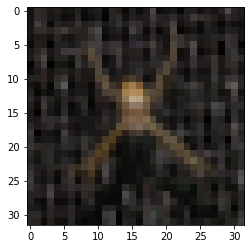

In [39]:
cifar100 = CIFAR100('data/cifar-100-python', download=True, train=False)

ID = [i for i in range(10000)]
choose = random.choice(ID)
image, class_id = cifar100[choose]
plt.imshow(image),class_id

In [40]:
img = data_transform(image)
img = torch.unsqueeze(img, dim=0)

In [41]:
with torch.no_grad():
    output = torch.squeeze(model(img.to(device))).cpu()
    predict = torch.softmax(output, dim=0)
    predict_cla = torch.argmax(predict).numpy()

In [42]:
predict_cla

array(79)

Text(0.5, 1.0, 'class: spider   prob: 0.701')

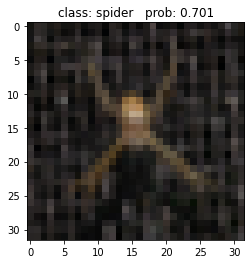

In [43]:
print_res = "class: {}   prob: {:.3}".format(train_dataset.classes[predict_cla],  predict[predict_cla].numpy())
plt.imshow(image)
plt.title(print_res)

-------

In [44]:
img_path = "/content/DL_Assign2/panda.jpg"
image = Image.open(img_path)

In [45]:
img = data_transform(image)
img = torch.unsqueeze(img, dim=0)

In [46]:
with torch.no_grad():
    output = torch.squeeze(model(img.to(device))).cpu()
    predict = torch.softmax(output, dim=0)
    predict_cla = torch.argmax(predict).numpy()

In [47]:
predict_cla

array(3)

Text(0.5, 1.0, 'class: bear   prob: 0.259')

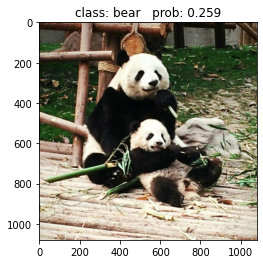

In [48]:
print_res = "class: {}   prob: {:.3}".format(train_dataset.classes[predict_cla],  predict[predict_cla].numpy())
plt.imshow(image)
plt.title(print_res)

In [49]:
for i in range(len(predict)):
    print("class: {:10}   prob: {:.3}".format(train_dataset.classes[i],  predict[i].numpy()))
plt.show()

class: apple        prob: 0.00561
class: aquarium_fish   prob: 0.00582
class: baby         prob: 0.00663
class: bear         prob: 0.259
class: beaver       prob: 0.00969
class: bed          prob: 0.00299
class: bee          prob: 0.00167
class: beetle       prob: 0.00548
class: bicycle      prob: 0.00161
class: bottle       prob: 0.0021
class: bowl         prob: 0.00861
class: boy          prob: 0.00527
class: bridge       prob: 0.0012
class: bus          prob: 0.000636
class: butterfly    prob: 0.00463
class: camel        prob: 0.00863
class: can          prob: 0.00331
class: castle       prob: 0.00308
class: caterpillar   prob: 0.00458
class: cattle       prob: 0.011
class: chair        prob: 0.00241
class: chimpanzee   prob: 0.00182
class: clock        prob: 0.0112
class: cloud        prob: 0.00382
class: cockroach    prob: 0.00193
class: couch        prob: 0.00712
class: crab         prob: 0.0132
class: crocodile    prob: 0.0164
class: cup          prob: 0.00775
class: dinosaur   

-------

### CLIP

In [50]:
%pip install ftfy regex tqdm
%pip install git+https://github.com/openai/CLIP.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-fik8ntqi
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-fik8ntqi
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369409 sha256=fa039320c1bce04234959586d78da0a1ba3c96049b86167a9d7e7dc6e16d0ecb
  Stored in directory: /tmp/pip-ephem-wheel-cache-dtvptget/wheels/fd/b9/c3/5b4470e35ed76e174bff77c92f91da82098d5e35fd5bc8cdac
Successfully built clip


In [51]:
import imp
import os
import clip
import torch
from torchvision.datasets import CIFAR100
import random
import matplotlib.pyplot as plt 

In [52]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)
cifar100 = CIFAR100('data/cifar-100-python', download=True, train=False)

100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 55.7MiB/s]


Files already downloaded and verified


(<matplotlib.image.AxesImage at 0x7f84e6da79d0>, 54)

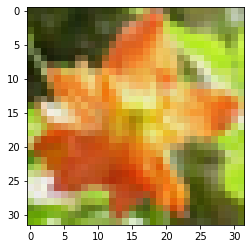

In [53]:
ID = [i for i in range(10000)]
choose = random.choice(ID)
image, class_id = cifar100[choose]
plt.imshow(image),class_id

In [54]:
image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in cifar100.classes]).to(device)

In [55]:
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

In [56]:
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

In [57]:
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{cifar100.classes[index]:>16s}: {100 * value.item():.2f}%")


Top predictions:

           tulip: 23.49%
      maple_tree: 17.74%
          orchid: 7.75%
    sweet_pepper: 6.84%
            rose: 6.03%


-------

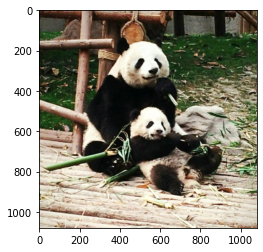

In [58]:
img_path = "/content/DL_Assign2/panda.jpg"
image = Image.open(img_path)
plt.imshow(image)

In [59]:
classes = cifar100.classes + ['panda']
len(classes)

101

In [60]:
image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in classes]).to(device)

In [61]:
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

In [62]:
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

In [63]:
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{classes[index]:>16s}: {100 * value.item():.2f}%")


Top predictions:

           panda: 98.10%
            bear: 0.57%
            baby: 0.50%
      lawn_mower: 0.22%
     willow_tree: 0.06%


### Prompt

In [64]:
from __future__ import print_function

import argparse
import os
from tqdm import tqdm
import time
import random
import wandb

import torch
import torch.backends.cudnn as cudnn
from torch.cuda.amp import GradScaler, autocast
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR100

import clip
from models import prompters
from utils import accuracy, AverageMeter, ProgressMeter, save_checkpoint
from utils import cosine_lr, convert_models_to_fp32, refine_classname

In [65]:
global best_acc1, device
best_acc1 = 0
device = "cuda" if torch.cuda.is_available() else "cpu"

In [66]:
class Args:

    print_freq = 100
    save_freq  = 50
    batch_size = 256
    num_workers =4
    epochs =3
    optim ='sgd'
    learning_rate =40
    weight_decay  =0
    warmup = 1000
    momentum =0.9
    patience =1000
    model = 'clip'
    arch ='vit_b32'
    method = 'padding'
    prompt_size = 30
    root = './data'
    dataset = 'cifar100'
    image_size = 224
    seed = 0
    model_dir = './save/models'
    image_dir = './save/images'
    filename = None
    trial = 1
    resume = None 
    evaluate = False 
    gpu = None 
    use_wandb = False

args=Args()               

In [67]:
args.filename = '{}_{}_{}_{}_{}_{}_lr_{}_decay_{}_bsz_{}_warmup_{}_trial_{}'. \
            format(args.method, args.prompt_size, args.dataset, args.model, args.arch,
                args.optim, args.learning_rate, args.weight_decay, args.batch_size, args.warmup, args.trial)

In [68]:
if args.seed is not None:
        random.seed(args.seed)
        torch.manual_seed(args.seed)
        cudnn.deterministic = True


In [69]:
model, preprocess = clip.load('ViT-B/32', device, jit=False)
convert_models_to_fp32(model)
model.eval()

CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          

In [70]:
prompter = prompters.__dict__[args.method](args).to(device)

In [71]:
if args.resume:
    if os.path.isfile(args.resume):
        print("=> loading checkpoint '{}'".format(args.resume))
        if args.gpu is None:
            checkpoint = torch.load(args.resume)
        else:
            loc = 'cuda:{}'.format(args.gpu)
            checkpoint = torch.load(args.resume, map_location=loc)
        args.start_epoch = checkpoint['epoch']
        best_acc1 = checkpoint['best_acc1']
        if args.gpu is not None:
            best_acc1 = best_acc1.to(args.gpu)
        prompter.load_state_dict(checkpoint['state_dict'])
        print("=> loaded checkpoint '{}' (epoch {})"
                .format(args.resume, checkpoint['epoch']))
    else:
        print("=> no checkpoint found at '{}'".format(args.resume))

In [72]:
template = 'This is a photo of a {}'
print(f'template: {template}')

template: This is a photo of a {}


In [73]:
train_dataset = CIFAR100(args.root, transform=preprocess, download=False, train=True)
val_dataset   = CIFAR100(args.root, transform=preprocess, download=False, train=False)

In [74]:
train_loader = DataLoader(train_dataset,
                        batch_size=args.batch_size, pin_memory=False,
                        num_workers=args.num_workers, shuffle=True)

val_loader = DataLoader(val_dataset,
                        batch_size=args.batch_size, pin_memory=False,
                        num_workers=args.num_workers, shuffle=False)

In [75]:
class_names = train_dataset.classes
class_names = refine_classname(class_names)
texts = [template.format(label) for label in class_names]

In [76]:
optimizer = torch.optim.SGD(prompter.parameters(),
                            lr=args.learning_rate,
                            momentum=args.momentum,
                            weight_decay=args.weight_decay)

In [77]:
criterion = torch.nn.CrossEntropyLoss().to(device)
scaler = GradScaler()
total_steps = len(train_loader) * args.epochs
scheduler = cosine_lr(optimizer, args.learning_rate, args.warmup, total_steps)

In [78]:
refined_template = template.lower().replace(' ', '_')
args.filename = f'{args.filename}_template_{refined_template}'
args.model_folder = os.path.join(args.model_dir, args.filename)

if not os.path.isdir(args.model_folder):
    os.makedirs(args.model_folder)

In [79]:
def train(train_loader, texts, model, prompter, optimizer, scheduler, criterion, scaler, epoch, args):
    batch_time = AverageMeter('Time', ':6.3f')
    data_time = AverageMeter('Data', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    top1 = AverageMeter('Acc@1', ':6.2f')
    progress = ProgressMeter(
        len(train_loader),
        [batch_time, data_time, losses, top1],
        prefix="Epoch: [{}]".format(epoch))

    prompter.train()
    num_batches_per_epoch = len(train_loader)

    end = time.time()
    for i, (images, target) in enumerate(tqdm(train_loader)):

        data_time.update(time.time() - end)
        step = num_batches_per_epoch * epoch + i
        scheduler(step)
        optimizer.zero_grad()

        images = images.to(device)
        target = target.to(device)
        text_tokens = clip.tokenize(texts).to(device)

        with autocast():
            prompted_images = prompter(images)
            output, _ = model(prompted_images, text_tokens)
            loss = criterion(output, target)
            scaler.scale(loss).backward()
            scaler.step(optimizer)
        scaler.update()

        model.logit_scale.data = torch.clamp(model.logit_scale.data, 0, 4.6052)
        acc1 = accuracy(output, target, topk=(1,))
        losses.update(loss.item(), images.size(0))
        top1.update(acc1[0].item(), images.size(0))

        batch_time.update(time.time() - end)
        end = time.time()

        if i % args.print_freq == 0:
            progress.display(i)

            if args.use_wandb:
                wandb.log({
                    'training_loss': losses.avg,
                    'training_acc': top1.avg
                     })

        if i % args.save_freq == 0:
            save_checkpoint({
                'epoch': epoch + 1,
                'state_dict': prompter.state_dict(),
                'best_acc1': best_acc1,
                'optimizer': optimizer.state_dict(),
            }, args)

    return losses.avg, top1.avg

In [80]:
def validate(val_loader, texts, model, prompter, criterion, args):
    batch_time = AverageMeter('Time', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    top1_org = AverageMeter('Original Acc@1', ':6.2f')
    top1_prompt = AverageMeter('Prompt Acc@1', ':6.2f')
    progress = ProgressMeter(
        len(val_loader),
        [batch_time, losses, top1_org, top1_prompt],
        prefix='Validate: ')

    # switch to evaluation mode
    prompter.eval()

    with torch.no_grad():
        end = time.time()
        for i, (images, target) in enumerate(tqdm(val_loader)):

            images = images.to(device)
            target = target.to(device)
            text_tokens = clip.tokenize(texts).to(device)
            prompted_images = prompter(images)

            # compute output
            output_prompt, _ = model(prompted_images, text_tokens)
            output_org, _ = model(images, text_tokens)
            loss = criterion(output_prompt, target)

            # measure accuracy and record loss
            acc1 = accuracy(output_prompt, target, topk=(1,))
            losses.update(loss.item(), images.size(0))
            top1_prompt.update(acc1[0].item(), images.size(0))

            acc1 = accuracy(output_org, target, topk=(1,))
            top1_org.update(acc1[0].item(), images.size(0))

            # measure elapsed time
            batch_time.update(time.time() - end)
            end = time.time()

            if i % args.print_freq == 0:
                progress.display(i)

        print(' * Prompt Acc@1 {top1_prompt.avg:.3f} Original Acc@1 {top1_org.avg:.3f}'
              .format(top1_prompt=top1_prompt, top1_org=top1_org))

        if args.use_wandb:
            wandb.log({
                'val_loss': losses.avg,
                'val_acc_prompt': top1_prompt.avg,
                'val_acc_org': top1_org.avg,
            })

    return top1_prompt.avg

In [81]:
if args.evaluate:
    acc1 = validate(val_loader, texts, model, prompter, criterion, args)
    # return

In [82]:
epochs_since_improvement = 0

In [83]:
for epoch in range(args.epochs):

    train(train_loader, texts, model, prompter, optimizer, scheduler, criterion, scaler, epoch, args)
    acc1 = validate(val_loader, texts, model, prompter, criterion, args)
    is_best = acc1 > best_acc1
    best_acc1 = max(acc1, best_acc1)

    save_checkpoint({
        'epoch': epoch + 1,
        'state_dict': prompter.state_dict(),
        'best_acc1': best_acc1,
        'optimizer': optimizer.state_dict(),
    }, args, is_best=is_best)

    if is_best:
        epochs_since_improvement = 0
    else:
        epochs_since_improvement += 1
        print(f"There's no improvement for {epochs_since_improvement} epochs.")

        if epochs_since_improvement >= args.patience:
            print("The training halted by early stopping criterion.")
            break

  1%|          | 1/196 [00:05<19:12,  5.91s/it]

Epoch: [0][  0/196]	Time  5.911 ( 5.911)	Data  3.686 ( 3.686)	Loss 2.0304e+00 (2.0304e+00)	Acc@1  51.56 ( 51.56)


 49%|████▉     | 97/196 [01:34<01:36,  1.03it/s]


KeyboardInterrupt: ignored